In [10]:
import pandas as pd
from pathlib import Path
import numpy as np 
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "..")   

from src.BinaryTriFactorizationEstimator import BinaryTriFactorizationEstimator
from src.BTNMF_util import  get_normalized_assignments, sweep_btf_grid, sweep_btf_grid
from src.BTNMF_util import pick_best_btf_setting
from src.plot_util import plot_block_annot_heatmap


In [11]:
%reload_ext autoreload
%autoreload 2

In [12]:
top_skus= [1503844,
 1473474,
 1463992,
 807493,
 1047679,
 1695835,
 1463810,
 1143685,
 1463814,
 1463860]
top_stores = [44, 45, 3, 47, 46, 49, 51, 48, 8, 7]

In [3]:
%pwd

'/Users/yvesgreatti/github/kaggle_favorita_grocery_sales_forecasting/notebook'

In [17]:
df = pd.read_csv("../data/20250707_train.csv", low_memory=True)
df.head()

/var/folders/w3/d06m5l_97yn4bnxd5t6cgbjr0000gn/T/ipykernel_19955/3711264053.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/20250707_train.csv")


,date,store_item,store,item,id,unit_sales,onpromotion
0,2013-01-01,25_103665,25,103665,0,7.000,NaN
1,2013-01-01,25_819209,25,819209,382,1.788,NaN
2,2013-01-01,25_819231,25,819231,383,1.055,NaN
3,2013-01-01,25_823245,25,823245,384,2.000,NaN
4,2013-01-01,25_827911,25,827911,385,2.000,NaN


In [95]:
df.query("store_item == '10_1000866'")

,store,item,date,store_item,unit_sales,id,onpromotion,weight
0,10,1000866,2014-01-01,10_1000866,NaN,NaN,None,1
94000,10,1000866,2014-01-02,10_1000866,NaN,NaN,None,1
188000,10,1000866,2014-01-03,10_1000866,NaN,NaN,None,1
282000,10,1000866,2014-01-04,10_1000866,NaN,NaN,None,1
376000,10,1000866,2014-01-05,10_1000866,NaN,NaN,None,1
470000,10,1000866,2014-01-06,10_1000866,NaN,NaN,None,1
564000,10,1000866,2014-01-07,10_1000866,NaN,NaN,None,1
658000,10,1000866,2014-01-08,10_1000866,NaN,NaN,None,1
752000,10,1000866,2014-01-09,10_1000866,NaN,NaN,None,1
846000,10,1000866,2014-01-10,10_1000866,NaN,NaN,None,1


In [13]:
df = pd.read_parquet("../output/data/2014_January_top_53_store_2000_item.parquet")
df.head()

,store,item,date,store_item,unit_sales,id,onpromotion,weight
0,10,1000866,2014-01-01,10_1000866,NaN,NaN,None,1
1,10,1001305,2014-01-01,10_1001305,NaN,NaN,None,1
2,10,1003679,2014-01-01,10_1003679,NaN,NaN,None,1
3,10,1004545,2014-01-01,10_1004545,NaN,NaN,None,1
4,10,1004550,2014-01-01,10_1004550,NaN,NaN,None,1


In [14]:
print(df["store"].nunique())
print(df["item"].nunique())

47
2000


In [ ]:
# 1) make sure unit_sales is numeric; treat missing as 0
df["unit_sales"] = pd.to_numeric(df["unit_sales"], errors="coerce").fillna(0)

# 2) total sales per store (across all dates/items)
totals = (
    df.groupby("store", as_index=False)["unit_sales"]
      .sum()                       # total per store
      .sort_values("unit_sales", ascending=False)
)

# 3) top-N stores
N = 10
top_stores = totals.head(N)
top_store_ids = top_stores["store"].tolist()

In [31]:
# 2) total sales per store (across all dates/items)
totals = (
    df.groupby("item", as_index=False)["unit_sales"]
      .sum()                       # total per store
      .sort_values("unit_sales", ascending=False)
)

# 3) top-N items
N = 10
tops = totals.head(N)
top_ids = tops["item"].tolist()
top_ids

[1503844,
 1473474,
 1463992,
 807493,
 1047679,
 1695835,
 1463810,
 1143685,
 1463814,
 1463860]

In [30]:
top_stores["store"].tolist()

[44, 45, 3, 47, 46, 49, 51, 48, 8, 7]

In [15]:
df.query("store_item == '10_999547'")

,store,item,date,store_item,unit_sales,id,onpromotion,weight
1999,10,999547,2014-01-01,10_999547,NaN,NaN,None,1
95999,10,999547,2014-01-02,10_999547,NaN,NaN,None,1
189999,10,999547,2014-01-03,10_999547,5.0,16407149.0,None,1
283999,10,999547,2014-01-04,10_999547,1.0,16472860.0,None,1
377999,10,999547,2014-01-05,10_999547,2.0,16541306.0,None,1
471999,10,999547,2014-01-06,10_999547,NaN,NaN,None,1
565999,10,999547,2014-01-07,10_999547,NaN,NaN,None,1
659999,10,999547,2014-01-08,10_999547,NaN,NaN,None,1
753999,10,999547,2014-01-09,10_999547,3.0,16796860.0,None,1
847999,10,999547,2014-01-10,10_999547,1.0,16859001.0,None,1


In [27]:
data_path = Path("../output/data/2014_January_top_53_store_2000_item_weekly_growth_rate.parquet")
df = pd.read_parquet(data_path)

In [67]:
df.head()

,store_item,date,sales_wk,growth_rate,direction,growth_up,growth_sideways,growth_down,week_end
0,10_1000866,2014-01-05,0.0,NaN,0,NaN,1.0,NaN,2014-01-05
1,10_1000866,2014-01-12,0.0,NaN,0,NaN,1.0,NaN,2014-01-12
2,10_1000866,2014-01-19,0.0,NaN,0,NaN,1.0,NaN,2014-01-19
3,10_1000866,2014-01-26,0.0,NaN,0,NaN,1.0,NaN,2014-01-26
4,10_1000866,2014-02-02,0.0,NaN,0,NaN,1.0,NaN,2014-02-02


In [28]:
df.describe()

,date,sales_wk,growth_rate,direction,growth_up,growth_sideways,growth_down,week_end
count,470000,470000.000000,245475.000000,470000.000000,96599.0,247390.0,126011.0,470000
mean,2014-01-18 23:59:59.999999744,34.172959,0.114894,-0.062579,1.0,1.0,1.0,2014-01-18 23:59:59.999999744
min,2014-01-05 00:00:00,-170.000000,-1.000000,-1.000000,1.0,1.0,1.0,2014-01-05 00:00:00
25%,2014-01-12 00:00:00,0.000000,-0.388889,-1.000000,1.0,1.0,1.0,2014-01-12 00:00:00
50%,2014-01-19 00:00:00,8.000000,-0.066901,0.000000,1.0,1.0,1.0,2014-01-19 00:00:00
75%,2014-01-26 00:00:00,32.000000,0.326083,0.000000,1.0,1.0,1.0,2014-01-26 00:00:00
max,2014-02-02 00:00:00,10010.000000,5.000000,1.000000,1.0,1.0,1.0,2014-02-02 00:00:00
std,NaN,95.931411,0.915263,0.685364,0.0,0.0,0.0,NaN


In [29]:
df.query("store_item == '10_1000866'")

,store_item,date,sales_wk,growth_rate,direction,growth_up,growth_sideways,growth_down,week_end
0,10_1000866,2014-01-05,0.0,NaN,0,NaN,1.0,NaN,2014-01-05
1,10_1000866,2014-01-12,0.0,NaN,0,NaN,1.0,NaN,2014-01-12
2,10_1000866,2014-01-19,0.0,NaN,0,NaN,1.0,NaN,2014-01-19
3,10_1000866,2014-01-26,0.0,NaN,0,NaN,1.0,NaN,2014-01-26
4,10_1000866,2014-02-02,0.0,NaN,0,NaN,1.0,NaN,2014-02-02


In [31]:
df2 = df.query("store_item == '10_999547'")
df2 

,store_item,date,sales_wk,growth_rate,direction,growth_up,growth_sideways,growth_down,week_end
9995,10_999547,2014-01-05,8.0,NaN,0,NaN,1.0,NaN,2014-01-05
9996,10_999547,2014-01-12,8.0,0.000000,0,NaN,1.0,NaN,2014-01-12
9997,10_999547,2014-01-19,19.0,1.375000,1,1.0,NaN,NaN,2014-01-19
9998,10_999547,2014-01-26,20.0,0.052632,1,1.0,NaN,NaN,2014-01-26
9999,10_999547,2014-02-02,8.0,-0.600000,-1,NaN,NaN,1.0,2014-02-02


In [32]:
def frac_stats(gr):  # gr: 1D growth series
    n = np.isfinite(gr).sum()
    return {
        "frac_up":       (gr > 0).sum() / n if n else np.nan,
        "frac_sideways": (gr == 0).sum() / n if n else np.nan,
        "frac_down":     (gr < 0).sum() / n if n else np.nan,
    }

print(frac_stats(df2["growth_rate"]))

{'frac_up': 0.5, 'frac_sideways': 0.25, 'frac_down': 0.25}


In [71]:
df["growth_rate"].mean()

0.11489449814762541

In [10]:
df["store"] = df["store_item"].str.split("_").str[0].astype(int)
df["item"] = df["store_item"].str.split("_").str[1].astype(int)

In [11]:
df.query("store == 10")

,store_item,date,sales_wk,growth_rate,direction,growth_up,growth_sideways,growth_down,week_end,store,item
0,10_1000866,2014-01-05,0.0,NaN,0,NaN,1.0,NaN,2014-01-05,10,1000866
1,10_1000866,2014-01-12,0.0,NaN,0,NaN,1.0,NaN,2014-01-12,10,1000866
2,10_1000866,2014-01-19,0.0,NaN,0,NaN,1.0,NaN,2014-01-19,10,1000866
3,10_1000866,2014-01-26,0.0,NaN,0,NaN,1.0,NaN,2014-01-26,10,1000866
4,10_1000866,2014-02-02,0.0,NaN,0,NaN,1.0,NaN,2014-02-02,10,1000866
...,...,...,...,...,...,...,...,...,...,...,...
9995,10_999547,2014-01-05,8.0,NaN,0,NaN,1.0,NaN,2014-01-05,10,999547
9996,10_999547,2014-01-12,8.0,0.000000,0,NaN,1.0,NaN,2014-01-12,10,999547
9997,10_999547,2014-01-19,19.0,1.375000,1,1.0,NaN,NaN,2014-01-19,10,999547
9998,10_999547,2014-01-26,20.0,0.052632,1,1.0,NaN,NaN,2014-01-26,10,999547


In [36]:

data_path = Path("../output/data/2014_January_top_53_store_2000_item_growth_rate_imputed_features.parquet")
df = pd.read_parquet(data_path)
df.head(10)

,store_item,gr_median,gr_std,gr_iqr,frac_up,frac_sideways,frac_down,up_to_down_ratio,ac_lag1,ac_lag4
0,10_1000866,-0.047619,0.459630,0.520833,0.50,0.0,0.50,1.000000,0.474464,-0.5
1,10_1001305,-0.047619,0.459630,0.520833,0.50,0.0,0.50,1.000000,0.474464,-0.5
2,10_1003679,-0.081169,0.301891,0.195860,0.25,0.0,0.75,0.333333,-0.797224,-0.5
3,10_1004545,-0.047619,0.459630,0.520833,0.50,0.0,0.50,1.000000,0.474464,-0.5
4,10_1004550,-0.107143,2.378891,2.375000,0.50,0.0,0.50,1.000000,-0.899349,-0.5
5,10_1004551,0.000000,0.297560,0.208333,0.25,0.5,0.25,1.000000,-0.563621,-0.5
6,10_1005456,-0.047619,0.459630,0.520833,0.50,0.0,0.50,1.000000,0.474464,-0.5
7,10_1005458,-0.047619,0.459630,0.520833,0.50,0.0,0.50,1.000000,0.474464,-0.5
8,10_1005461,-0.047619,0.459630,0.520833,0.50,0.0,0.50,1.000000,0.474464,-0.5
9,10_1005463,-0.047619,0.459630,0.520833,0.50,0.0,0.50,1.000000,0.474464,-0.5


In [37]:
df.query("store_item == '10_999547'")

,store_item,gr_median,gr_std,gr_iqr,frac_up,frac_sideways,frac_down,up_to_down_ratio,ac_lag1,ac_lag4
1999,10_999547,0.026316,0.721483,0.533224,0.5,0.25,0.25,2.0,-0.623485,-0.5


In [38]:
df[["store", "item"]] = df["store_item"].str.split("_", n=1, expand=True)

In [39]:
df.head()

,store_item,gr_median,gr_std,gr_iqr,frac_up,frac_sideways,frac_down,up_to_down_ratio,ac_lag1,ac_lag4,store,item
0,10_1000866,-0.047619,0.459630,0.520833,0.50,0.0,0.50,1.000000,0.474464,-0.5,10,1000866
1,10_1001305,-0.047619,0.459630,0.520833,0.50,0.0,0.50,1.000000,0.474464,-0.5,10,1001305
2,10_1003679,-0.081169,0.301891,0.195860,0.25,0.0,0.75,0.333333,-0.797224,-0.5,10,1003679
3,10_1004545,-0.047619,0.459630,0.520833,0.50,0.0,0.50,1.000000,0.474464,-0.5,10,1004545
4,10_1004550,-0.107143,2.378891,2.375000,0.50,0.0,0.50,1.000000,-0.899349,-0.5,10,1004550


In [41]:
df["store"] = df["store"].astype(int)
df["item"] = df["item"].astype(int)
top_df = df[df["store"].isin(top_stores) & df["item"].isin(top_skus)]
# top_gc_median_df = top_df[["store","item", "gc_median"]]
# top_gc_median_df = top_gc_median_df.pivot(index="store", columns="item", values="gc_median")
# top_gc_median_df

In [42]:
top_df

,store_item,gr_median,gr_std,gr_iqr,frac_up,frac_sideways,frac_down,up_to_down_ratio,ac_lag1,ac_lag4,store,item
56063,3_1047679,0.061644,0.211468,0.132762,0.75,0.00,0.25,3.0,0.765242,-0.5,3,1047679
56248,3_1143685,-0.054486,0.226085,0.381211,0.50,0.00,0.50,1.0,-0.916125,-1.0,3,1143685
56700,3_1463810,-0.043037,0.262000,0.356142,0.50,0.00,0.50,1.0,0.275397,-0.5,3,1463810
56702,3_1463814,-0.021405,0.264118,0.233271,0.25,0.25,0.50,0.5,0.800854,-0.5,3,1463814
56710,3_1463860,-0.044905,0.185849,0.206626,0.25,0.25,0.50,0.5,0.991938,-0.5,3,1463860
...,...,...,...,...,...,...,...,...,...,...,...,...
90729,8_1463992,0.086899,0.213226,0.342778,0.50,0.00,0.50,1.0,0.922881,-0.5,8,1463992
90811,8_1473474,-0.095203,0.319735,0.288866,0.25,0.25,0.50,0.5,0.971145,-0.5,8,1473474
90862,8_1503844,-0.024563,0.489857,0.341173,0.25,0.50,0.25,1.0,0.940881,-0.5,8,1503844
91019,8_1695835,-0.049717,0.329461,0.259886,0.25,0.25,0.50,0.5,0.949337,-0.5,8,1695835


In [43]:
top_df.describe()

,gr_median,gr_std,gr_iqr,frac_up,frac_sideways,frac_down,up_to_down_ratio,ac_lag1,ac_lag4,store,item
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,-0.031337,0.289787,0.307756,0.337500,0.202500,0.460000,0.885000,0.496964,-0.480000,34.800000,1.352749e+06
std,0.084253,0.092329,0.145097,0.171796,0.186998,0.153741,0.669897,0.576261,0.255446,19.078784,2.539750e+05
min,-0.271890,0.080223,0.073961,0.000000,0.000000,0.250000,0.000000,-0.995566,-1.000000,3.000000,8.074930e+05
25%,-0.070829,0.239467,0.217072,0.250000,0.000000,0.250000,0.500000,0.186298,-0.500000,8.000000,1.143685e+06
50%,-0.031292,0.276556,0.273157,0.250000,0.250000,0.500000,1.000000,0.784028,-0.500000,45.500000,1.463837e+06
75%,0.004096,0.319712,0.341574,0.500000,0.250000,0.500000,1.000000,0.929994,-0.500000,48.000000,1.473474e+06
max,0.250997,0.739482,0.992163,0.750000,0.500000,0.750000,3.000000,0.999051,0.500000,51.000000,1.695835e+06


In [44]:

stores = np.sort(top_df["store"].unique())
items  = np.sort(top_df["item"].unique())
features = ["gr_median","gr_std","gr_iqr",
            "frac_up","frac_sideways","frac_down","up_to_down_ratio",
            "ac_lag1","ac_lag4"]
# features = ["gr_median","gr_std","gr_iqr",
#             "frac_up","frac_sideways","frac_down","up_to_down_ratio",
#             "ac_lag1","ac_lag4","ac_lag12",
#             "trend_slope","seasonal_strength"]

I, J, D = len(stores), len(items), len(features)
rpos = {s: i for i, s in enumerate(stores)}
cpos = {t: j for j, t in enumerate(items)}

X = np.full((I, J, D), np.nan, dtype=np.float64)
M = np.zeros((I, J), dtype=bool)

for _, row in top_df.iterrows():
    i = rpos[row["store"]]
    j = cpos[row["item"]]
    X[i, j, :] = row[features].to_numpy(dtype=np.float64)
    M[i, j] = True

# --- 2) per-feature scaling (recommended) ---
# z-score each channel using only observed cells; keep NaNs for now
for d in range(D):
    vals = X[..., d][M]
    mu = np.nanmedian(vals)
    s = np.nanstd(vals) if np.nanstd(vals) > 1e-12 else 1.0
    X[..., d] = (X[..., d] - mu) / s



In [45]:
X.shape

(10, 10, 9)

In [46]:
X

array([[[-8.27523854e-01, -1.14913395e+00,  2.02283940e-02,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -7.50143010e-01, -8.51694486e-01,  3.93444738e+00],
        [ 1.10861683e+00, -7.08506979e-01, -9.72475018e-01,
          2.92508970e+00, -1.34364431e+00, -1.63430113e+00,
          3.00057204e+00, -3.27656527e-02,  0.00000000e+00],
        [-2.76670183e-01, -5.49395607e-01,  7.48454499e-01,
          1.46254485e+00, -1.34364431e+00,  0.00000000e+00,
          0.00000000e+00, -2.96518481e+00, -1.96722369e+00],
        [-1.40106749e-01, -1.58446169e-01,  5.74809784e-01,
          1.46254485e+00, -1.34364431e+00,  0.00000000e+00,
          0.00000000e+00, -8.87087487e-01,  0.00000000e+00],
        [ 1.17934724e-01, -1.35392629e-01, -2.76277428e-01,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -7.50143010e-01,  2.93445074e-02,  0.00000000e+00],
        [-1.62388248e-01, -9.87377343e-01, -4.60843795e-01,
          0.00000000e+00,  0.000000

In [47]:
np.isnan(X).any()

False

In [48]:
from datetime import date

fn = Path("../output/data/")/f"Xtensor_{date.today().isoformat()}_{len(stores)}x{len(items)}x{len(features)}.npz"
np.savez_compressed(
    fn,
    X=X, M=M, stores=stores, items=items, features=np.array(features)
)

In [18]:
data_path = Path("../output/data/2014_January_top_53_store_2000_item_growth_rate_features.parquet")
df = pd.read_parquet(data_path)
df.head(10)

,store_item,gc_median,gc_std,gc_iqr,frac_up,frac_sideways,frac_down,up_to_down_ratio,ac_lag1,ac_lag4,ac_lag12,trend_slope,seasonal_strength,gr_median
0,10_1000866,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10_1001305,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10_1003679,-0.081169,0.301891,0.195860,1.0,1.0,1.0,0.333333,-0.797224,NaN,NaN,NaN,NaN,-0.081169
3,10_1004545,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10_1004550,-0.107143,2.378890,2.375000,1.0,1.0,1.0,1.000000,-0.899349,NaN,NaN,NaN,NaN,-0.107143
5,10_1004551,0.000000,0.297560,0.208333,1.0,1.0,1.0,1.000000,-0.563621,NaN,NaN,NaN,NaN,0.000000
6,10_1005456,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10_1005458,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10_1005461,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10_1005463,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
model_path = Path("../output/data/2014_January_top_53_store_2000_item_growth_rate_clustered_model.pickle")
import pickle
with open(model_path, "rb") as f:
    model_data = pickle.load(f)

In [175]:
model_data

{'U': array([[0, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int8),
 'V': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0]], dtype=int8),
 'B': array([[ 0.        ,  0.00202563, -0.00255704, ...,  0.        ,
          0.00667034,  0.        ],
        [ 0.        ,  0.00127882,  0.00154426, ...,  0.        ,
          0.00469812,  0.        ],
        [ 0.        , -0.00908657, -0.00126534, ...,  0.        ,
          0.00428655,  0.        ],
        ...,
        [ 0.        ,  0.0166388 , -0.00360951, ...,  0.        ,
          0.00611072,  0.        ],
        [ 0.        , -0.00335717, -0.00227049, ...,  0.        ,
          0.00105083,  0.        ],
        [ 0.

In [3]:
data_path = Path("../output/data/2014_January_top_53_store_2000_item_growth_rate_clustered_medians_cyc_X_y_features.parquet")
df = pd.read_parquet(data_path)

In [35]:
path = Path("../output/data/10_1000866.csv")
#df.query('store_item == "10_638308"')
df.query("store_item == '10_638308'").to_csv(path)

In [40]:
# Your data as a list of lists
data = [
    [39, 43, 4, 9, 14, 10, 14],
    [45, 58, 6, 12, 16, 7, 13],
    [1, 14, 3, 64, 21, 11, 15],
    [51, 49, 5, 11, 2, 0, 0],
    [0, 9, 2, 56, 0, 1, 2]
]

# Column names
columns = [1, 2, 3, 4, 5, 6, 7]

# Row labels
index = [1, 2, 3, 4, 5]

# Create DataFrame
df = pd.DataFrame(data, columns=columns, index=index)
# Set index name and dtype
df.index = df.index.astype("int64")  # ensure dtype
df.index.name = "store"              # set name

# Set columns dtype and name
df.columns = df.columns.astype("int64")  # ensure dtype
df.columns.name = "item"                 # set name
df

item,1,2,3,4,5,6,7
store,,,,,,,
1,39,43,4,9,14,10,14
2,45,58,6,12,16,7,13
3,1,14,3,64,21,11,15
4,51,49,5,11,2,0,0
5,0,9,2,56,0,1,2


In [41]:

# always coerce to float
X = df.to_numpy(dtype=np.float64)

est = BinaryTriFactorizationEstimator(
    n_row_clusters=9,         # try a few values (e.g., 3–8)
    n_col_clusters=4,
    k_row=None,               # no cap → multi-hard chosen by data
    k_col=None,
    loss="gaussian",
    alpha=1e-2,               # ridge on B for stability
    beta=0.4,                 # >0 makes memberships sparser
    block_l1=0.1,             # 0 = off; >0 = L1 on B (0.01 = good start)
    b_inner=15,               # inner prox steps for B when block_l1>0
    max_iter=60,
    tol=1e-5,
    random_state=42,
    verbose=False,
).fit(X)



In [42]:
#assign = est.filter_blocks(X= df.to_numpy(), min_keep=10)
mask   = est.allowed_mask_from_gap(min_keep=5)   # aim for ~5 colors
assign = est.assign_unique_blocks(X= X, method="gaussian_delta",
                                  allowed_mask=mask, on_empty="fallback")
block_id = assign["block_id"]  # (I×J), each cell → one color
df2 = get_normalized_assignments(assign, df)

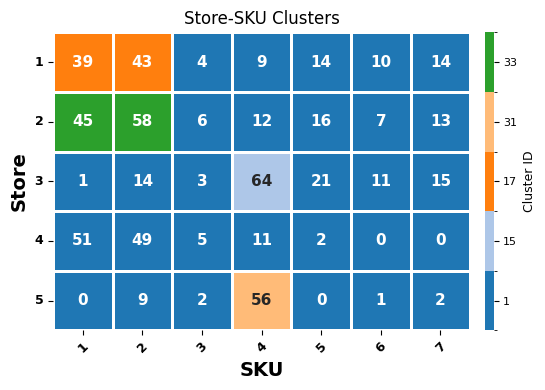

In [43]:
#row_order, col_order = est.get_row_col_orders(assign, df)
#row_order, col_order = est.get_row_col_orders(assign, norm_data2)
df2 = get_normalized_assignments(assign, df)  # contains unique per-cell block_id
#row_order, col_order = get_row_col_orders_smart(df2)
row_order = sorted(df2["store"].unique())
col_order = sorted(df2["item"].unique())

fn = Path("../output/figures/store_item_toy_data_heatmap.tiff")
plot_block_annot_heatmap(
    df2,
    ttl="Store-SKU Clusters",
    value_col="growth_rate_1", 
    block_col="block_id",
    row_col="store", 
    col_col="item",
    date_col=None,                
    row_order=row_order, 
    col_order=col_order,
    fmt= "{:.0f}",
    cell_h=0.6, 
    cell_w=0.75, 
    font_size=11,
    #figsize=(6, 4),
    x_label="SKU",
    y_label="Store",
    xlabel_size=14,
    ylabel_size=14,
    label_weight="bold",
    fn=None,
    xtick_rotation=45,
)

In [48]:
# Freeze your defaults once, then sweep:
make_btf = BinaryTriFactorizationEstimator.factory(
    k_row=None, 
    k_col=None, 
    loss="gaussian", 
    alpha=1e-2, 
    beta=0.6,
    block_l1=0.1,             # 0 = off; >0 = L1 on B (0.01 = good start)
    b_inner=15,               # inner prox steps for B when block_l1>0
    max_iter=50,
    tol=1e-5,
)
    
# Define your grid
R_list = range(1, 10)
C_list = range(1, 10)

# Run the sweep
grid_df = sweep_btf_grid(
    make_btf,
    X,
    R_list,
    C_list,
    restarts=3,
    seeds=range(123, 999),     # optional
    min_keep=6,
    fit_kwargs={"max_iter": 200, "tol": 1e-4},  # pass your estimator kwargs here
)

# Rank and pick the best (edit ranking logic inside pick_best_btf_setting if desired)
ranked_df, best = pick_best_btf_setting(grid_df)


2025-09-08 08:35:13,126 - INFO - Fitting BTF with R=1, C=1
2025-09-08 08:35:13,140 - INFO - Computing cell mask for R=1, C=1
/Users/yvesgreatti/github/kaggle_favorita_grocery_sales_forecasting/notebook/../src/BTNMF_util.py:792: RuntimeWarning: Mean of empty slice
  float(np.nanmean(wcvdf["silhouette_like"]))
2025-09-08 08:35:13,145 - INFO - Fitting BTF with R=1, C=2
2025-09-08 08:35:13,165 - INFO - Computing cell mask for R=1, C=2
/Users/yvesgreatti/github/kaggle_favorita_grocery_sales_forecasting/notebook/../src/BTNMF_util.py:792: RuntimeWarning: Mean of empty slice
  float(np.nanmean(wcvdf["silhouette_like"]))
2025-09-08 08:35:13,170 - INFO - Fitting BTF with R=1, C=3
2025-09-08 08:35:13,192 - INFO - Computing cell mask for R=1, C=3
2025-09-08 08:35:13,196 - INFO - Fitting BTF with R=1, C=4
2025-09-08 08:35:13,227 - INFO - Computing cell mask for R=1, C=4
2025-09-08 08:35:13,231 - INFO - Fitting BTF with R=1, C=5
2025-09-08 08:35:13,252 - INFO - Computing cell mask for R=1, C=5
2025-

In [49]:
best

n_row                                9.000000
n_col                                4.000000
Mask_Nobs                           11.000000
Mask_Coverage                        0.314286
seed                               123.000000
Loss                               193.697610
Percent_Loss                         0.825334
RMSE                                 2.352492
Percent_RMSE                         9.084789
PVE                                  0.977560
Mean Silhouette                      0.588852
BlockContribution_Total          18626.202594
BlockContribution_PerCell         1693.291145
BlockContribution_RelBaseline        5.808148
BlockContribution_FracWeak20         0.000000
BlockContribution_Gini               0.869474
B_Sparsity                           0.642857
Coverage                             1.000000
AIC                                215.928380
BIC                                230.252610
Name: 0, dtype: float64